In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ggTraining = "garbled-training-"
ggTest = "garbled-testing-"

uspsTraining = "usps-training-"
uspsTest = "usps-testing-"

In [3]:
def loaddigits(filename):
    return np.genfromtxt(filename, delimiter= ",")

In [4]:
def classify_costheta(digit, means):
    dist = [0 for i in range(10)]
    dnorm = np.linalg.norm(digit)
    for i in range(10):
        dist[i] = np.dot(digit, means[i]) / (dnorm * np.linalg.norm(means[i]))
    return np.argmax(dist)

def classify_euclidean(digit, means):
    dist = [0 for i in range(10)]
    for i in range(10):
        dist[i] = np.linalg.norm(digit - means[i])
    return np.argmin(dist)

In [5]:
def classify_svd(digit, classificationmatrices):
    dist = [0 for i in range(10)]
    for i in range(10):
        dist[i] = np.linalg.norm(digit @ np.transpose(classificationmatrices[i]))
    return np.argmin(dist)

In [6]:
svd_cutoffs = [1, 2, 4, 6, 8, 10]
acc = pd.DataFrame(index=[['Cos theta', 'Euclidean', 'svd_cutoff1', 'svd_cutoff2', 'svd_cutoff4', 'svd_cutoff6', 'svd_cutoff8', 'svd_cutoff10']])

In [7]:
T = [0 for i in range(10)]
B = [0 for i in range(len(acc))]
def train_test(trainingprefix, testingprefix, svd_cutoffs):
    
    # Load training data
    for i in range(10):
        T[i] = loaddigits(trainingprefix + str(i) + ".csv")
    
    # Calculate averages
    means = [0 for i in range(10)]
    for i in range(10):
        means[i] = np.average(T[i], axis = 0)
        
    # Load and classify testing data: Cos theta    
    correct = 0
    total = 0
    for i in range(10):
        A = loaddigits(testingprefix + str(i) + ".csv")
        for j in range(len(A)):
            if i == classify_costheta(A[j], means):
                correct += 1
            total += 1
    B[0] = correct*100.0/total
    
    # Load and classify testing data: Euclidean
    correct = 0
    total = 0
    for i in range(10):
        A = loaddigits(testingprefix + str(i) + ".csv")
        for j in range(len(A)):
            if i == classify_euclidean(A[j], means):
                correct += 1
            total += 1
    B[1] = correct*100.0/total
    
    # Calculate SVDs and classification matrices for given cutoffs
    classificationmatrices = [[0 for _ in range(10)] for _ in svd_cutoffs]
    for i in range(10):
        U, S, Vt = np.linalg.svd(np.transpose(T[i]))
        for c in range(len(svd_cutoffs)):
            Uk = U[:,0:svd_cutoffs[c]]
            classificationmatrices[c][i] = np.identity(256) - (Uk @ np.transpose(Uk))
            
    # Load and classify testing data : SVD, given cutoffs only
    for c in range(len(svd_cutoffs)):
        correct = 0
        total = 0
        cutoff = svd_cutoffs[c]
        for i in range(10):
            A = loaddigits(testingprefix + str(i) + ".csv")
            for j in range(len(A)):
                if i == classify_svd(A[j], classificationmatrices[c]):
                    correct += 1
                total += 1
        B[c+2] = correct * 100.0 / total
    acc[f'{trainingprefix}{testingprefix}'] = B

In [8]:
# Function to visualize digits
def visualize_digits(digit_arrays, labels, title, num_samples=5):
    plt.figure(figsize=(10, 8))
    for i in range(num_samples):
        for j in range(10):
            plt.subplot(num_samples, 10, i * 10 + j + 1)
            plt.imshow(digit_arrays[j][i].reshape(16, 16), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(labels[j])
    plt.suptitle(title)
    plt.show()


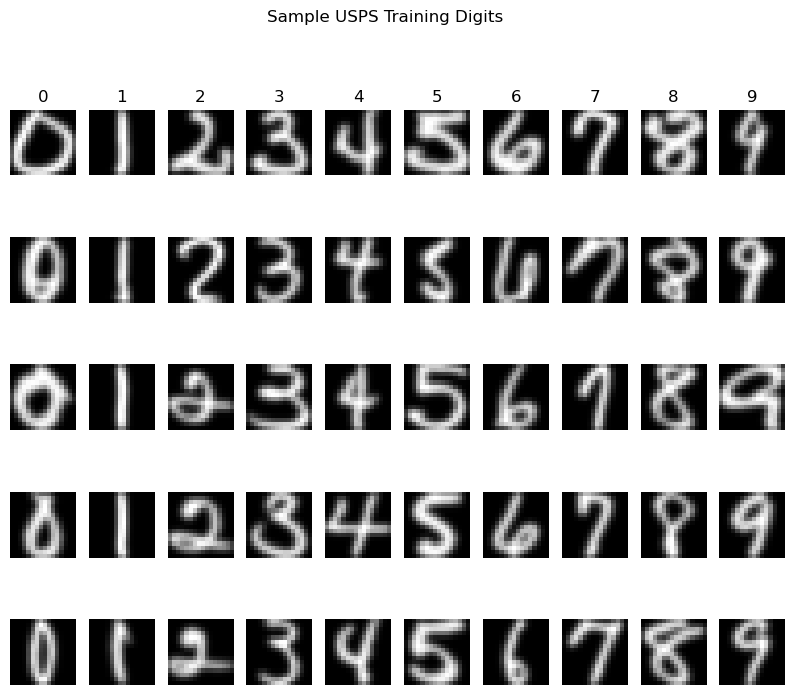

[array([[-1.      , -0.999977, -0.99842 , ..., -0.931514, -0.992336,
        -0.99966 ],
       [-1.      , -0.999998, -0.99976 , ..., -0.999839, -0.999998,
        -1.      ],
       [-0.999999, -0.99997 , -0.999545, ..., -0.999056, -0.99999 ,
        -1.      ],
       [-1.      , -1.      , -0.999878, ..., -0.993412, -0.999916,
        -1.      ],
       [-1.      , -1.      , -0.999999, ..., -1.      , -1.      ,
        -1.      ]]), array([[-1.      , -1.      , -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-1.      , -1.      , -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-1.      , -1.      , -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-1.      , -1.      , -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-1.      , -1.      , -0.999999, ..., -1.      , -1.      ,
        -1.      ]]), array([[-1.      , -1.      , -0.999937, ...,  0.166672, -0.384226,
        -0.850396],
       [-0.999975, -0.99894

In [59]:
# Load some digits to visualize
sample_digits = [loaddigits(uspsTraining + str(i) + ".csv")[:5] for i in range(10)]
visualize_digits(sample_digits, list(range(10)), 'Sample USPS Training Digits')
print(sample_digits)

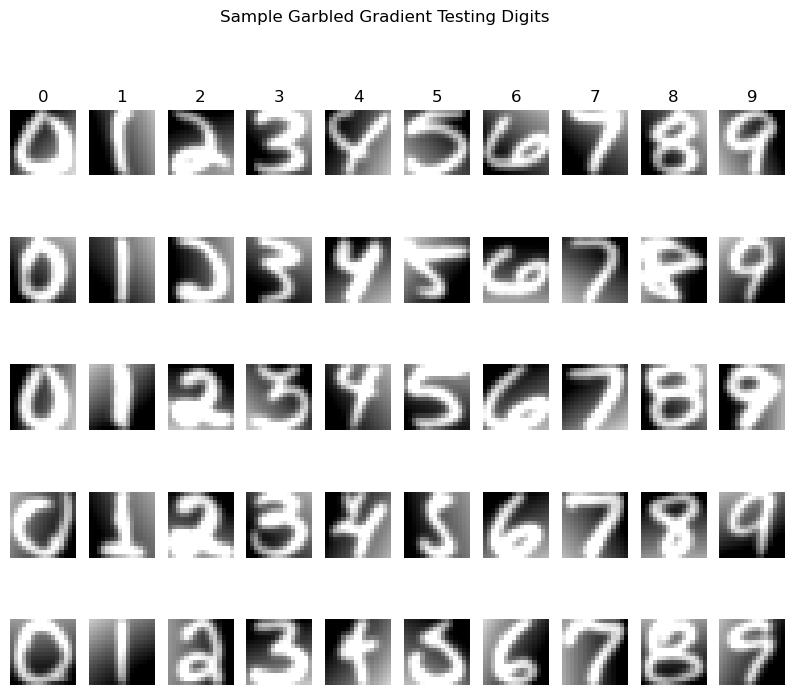

In [10]:
# Load some digits to visualize
sample_digits = [loaddigits(ggTest + str(i) + ".csv")[:5] for i in range(10)]
visualize_digits(sample_digits, list(range(10)), 'Sample Garbled Gradient Testing Digits')

## a. Train on USPS, Test on GG¶

In [11]:
train_test(uspsTraining, ggTest, svd_cutoffs)

In [12]:
acc

,usps-training-garbled-testing-
Cos theta,65.271550
Euclidean,49.476831
svd_cutoff1,58.046836
svd_cutoff2,53.163926
svd_cutoff4,75.286497
svd_cutoff6,80.069756
svd_cutoff8,78.226208
svd_cutoff10,76.332835


In [14]:
train_test(uspsTraining, uspsTest, svd_cutoffs)

In [15]:
acc

,usps-training-garbled-testing-,usps-training-usps-testing-
Cos theta,65.271550,80.866966
Euclidean,49.476831,81.614350
svd_cutoff1,58.046836,80.866966
svd_cutoff2,53.163926,85.401096
svd_cutoff4,75.286497,91.728949
svd_cutoff6,80.069756,92.675635
svd_cutoff8,78.226208,94.020927
svd_cutoff10,76.332835,94.768311


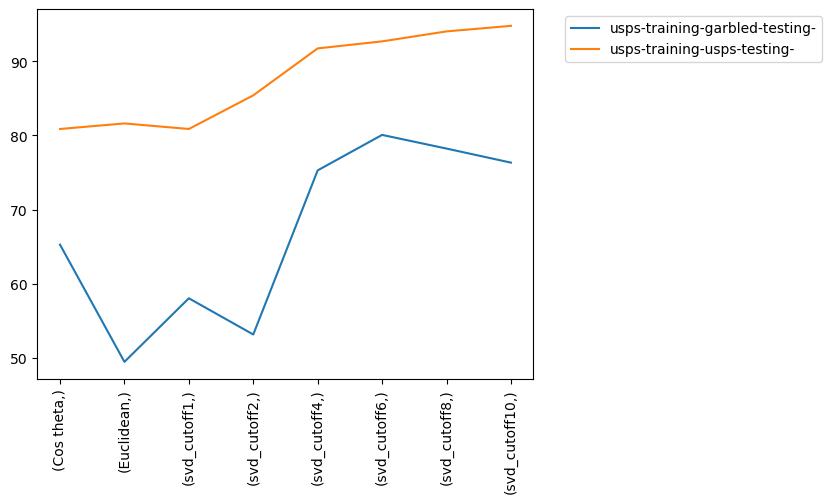

In [16]:
ax = plt.gca()

for col in acc.columns:
    acc.plot(kind='line', y=col, ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

## b. Train on USPS, Test on GG and Train on garbled, Test on USPS

trainingprefix = ggTraining
testingprefix = ggTest

In [17]:
train_test(trainingprefix, testingprefix, svd_cutoffs)

In [18]:
trainingprefix = ggTraining
testingprefix = uspsTest

In [19]:
train_test(trainingprefix, testingprefix, svd_cutoffs)

In [20]:
acc

,usps-training-garbled-testing-,usps-training-usps-testing-,garbled-training-garbled-testing-,garbled-training-usps-testing-
Cos theta,65.271550,80.866966,69.506726,61.983059
Euclidean,49.476831,81.614350,70.254111,62.132536
svd_cutoff1,58.046836,80.866966,60.239163,60.288989
svd_cutoff2,53.163926,85.401096,62.032885,59.940209
svd_cutoff4,75.286497,91.728949,85.899352,60.189337
svd_cutoff6,80.069756,92.675635,90.134529,74.289985
svd_cutoff8,78.226208,94.020927,92.426507,82.610862
svd_cutoff10,76.332835,94.768311,92.775286,84.803189


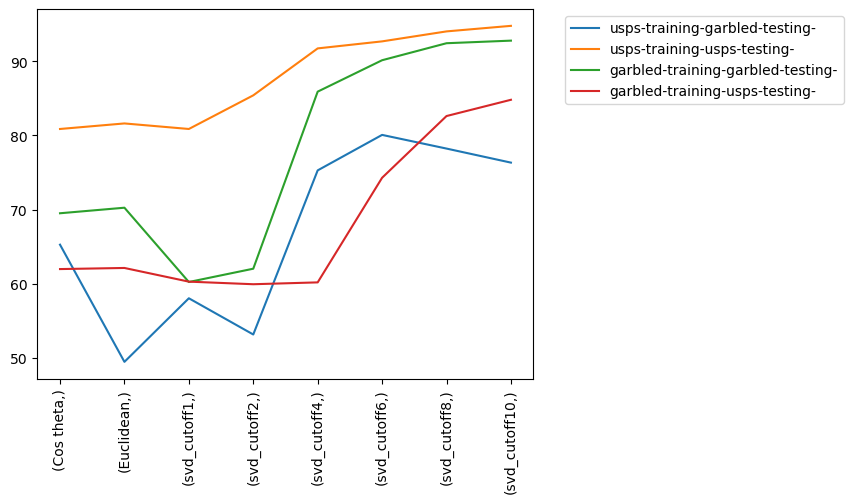

In [21]:
ax = plt.gca()

for col in acc.columns:
    acc.plot(kind='line', y=col, ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

## C. Training using a mixed data set

In [42]:
# Fill the first part of the list with data from trainingdataset1
for i in [0,2,4,6,8]:
    T[i] = loaddigits(uspsTraining + str(i) + ".csv")

# Fill the remaining part of the list with data from trainingdataset2
for i in [1,3,5,7,9]:
    T[i] = loaddigits(ggTraining + str(i) + ".csv")

In [43]:
acc = pd.DataFrame(index=[['Cos theta', 'Euclidean', 'svd_cutoff1', 'svd_cutoff2', 'svd_cutoff4', 'svd_cutoff6', 'svd_cutoff8', 'svd_cutoff10']])

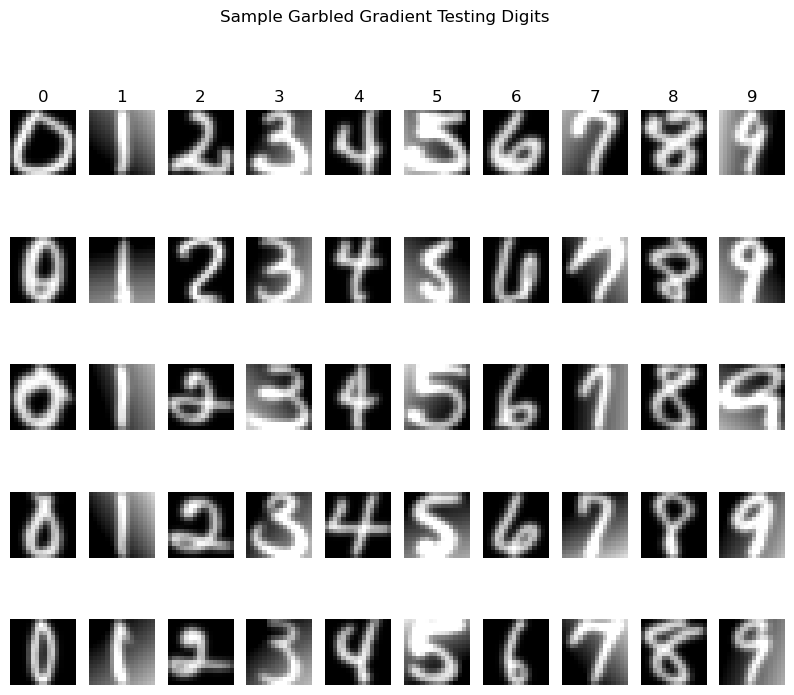

In [44]:
# Load some digits to visualize
sample_digits = [T[i][:5] for i in range(10)]
visualize_digits(sample_digits, list(range(10)), 'Sample Garbled Gradient Testing Digits')

In [45]:
# Calculate averages
means = [0 for i in range(10)]
for i in range(10):
    means[i] = np.average(T[i], axis = 0)
        
# Load and classify testing data: Cos theta    
correct = 0
total = 0
for i in range(10):
    A = loaddigits(testingprefix + str(i) + ".csv")
    for j in range(len(A)):
        if i == classify_costheta(A[j], means):
            correct += 1
        total += 1
B[0] = correct*100.0/total
# Load and classify testing data: Euclidean
correct = 0
total = 0
for i in range(10):
    A = loaddigits(ggTest + str(i) + ".csv")
    for j in range(len(A)):
        #total += 1  # Increment total for each classification attempt
        if i == classify_euclidean(A[j], means):
            correct += 1
        total += 1    
B[1] = correct*100.0/total

classificationmatrices = [[0 for _ in range(10)] for _ in svd_cutoffs]
for i in range(10):
    U, S, Vt = np.linalg.svd(np.transpose(T[i]))
    for c in range(len(svd_cutoffs)):
        Uk = U[:,0:svd_cutoffs[c]]
        classificationmatrices[c][i] = np.identity(256) - (Uk @ np.transpose(Uk))
            
# Load and classify testing data: SVD, given cutoffs only
for c in range(len(svd_cutoffs)):
    correct = 0
    total = 0
    cutoff = svd_cutoffs[c]
    for i in range(10):
        A = loaddigits(ggTest + str(i) + ".csv")
        for j in range(len(A)):
            #total += 1  # Increment total for each classification attempt
            if i == classify_svd(A[j], classificationmatrices[c]):
                correct += 1
            total += 1
    B[c+2] = correct * 100.0 / total
acc['mix1'] = B

In [46]:
#manually prepared dataset
trainingprefix = "mix2-training-"
testingprefix = "garbled-testing-"

In [47]:
train_test(trainingprefix, testingprefix, svd_cutoffs)

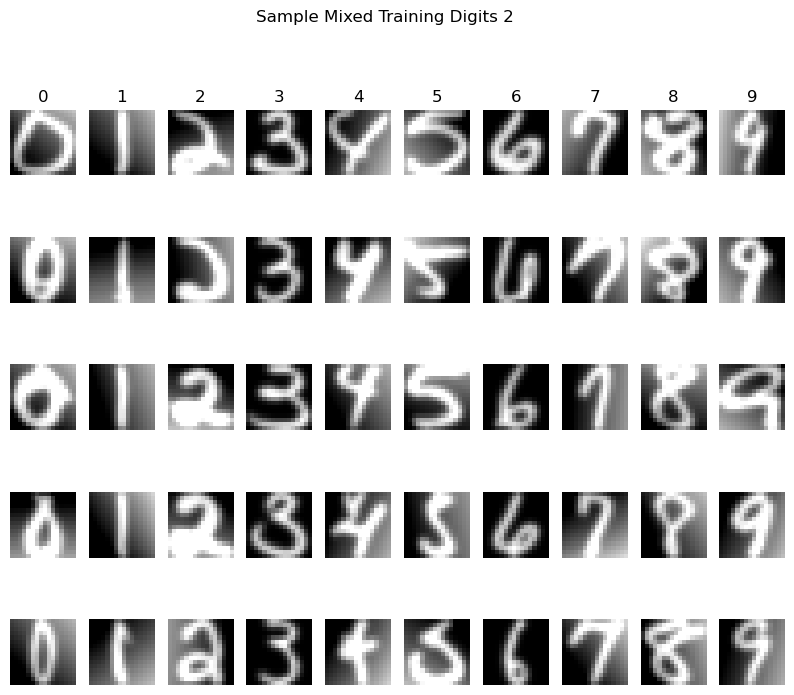

In [48]:
# Load some digits to visualize
sample_digits = [T[i][:5] for i in range(10)]
visualize_digits(sample_digits, list(range(10)), 'Sample Mixed Training Digits 2')

In [49]:
acc

,mix1,mix2-training-garbled-testing-
Cos theta,52.715496,62.979571
Euclidean,42.252118,62.032885
svd_cutoff1,45.490782,56.502242
svd_cutoff2,40.508221,56.651719
svd_cutoff4,57.000498,74.937718
svd_cutoff6,58.495267,78.923767
svd_cutoff8,57.498754,80.069756
svd_cutoff10,58.694569,80.568012


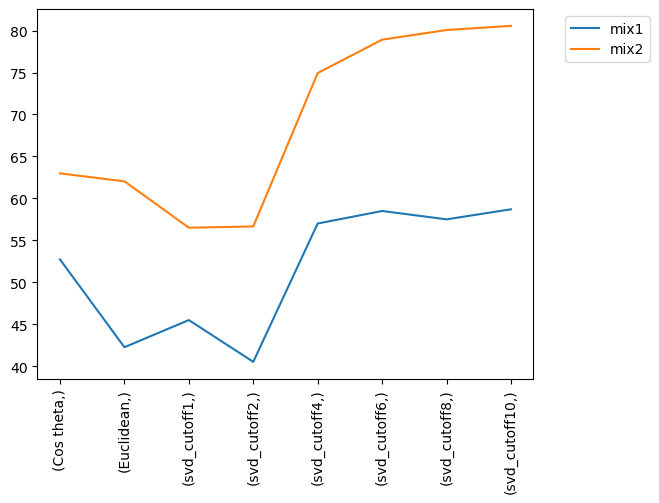

In [52]:
ax = plt.gca()

for col in acc.columns:
    acc.plot(kind='line', y=col, ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1), labels = ["mix1", "mix2"])
plt.xticks(rotation=90)
plt.show()

## D. SVD basis classification algorithm for all combination of Train and Test sets with different SVD cut offs

In [55]:
k = [i for i in range(1, 256)]
acc = pd.DataFrame()

In [54]:
def SVD_basic(trainingprefix, testingprefix, svd_cutoffs):
    
    # Load training data
    for i in range(10):
        T[i] = loaddigits(trainingprefix + str(i) + ".csv")
    
    # Calculate SVDs and classification matrices for given cutoffs
    classificationmatrices = [[0 for _ in range(10)] for _ in svd_cutoffs]
    for i in range(10):
        U, S, Vt = np.linalg.svd(np.transpose(T[i]))
        for c in range(len(svd_cutoffs)):
            Uk = U[:,0:k[c]]
            classificationmatrices[c][i] = np.identity(256) - (Uk @ np.transpose(Uk))
    
    B = [0 for i in range(len(svd_cutoffs))]
    # Load and classify testing data : SVD, given cutoffs only
    for c in range(len(svd_cutoffs)):
        correct = 0
        total = 0
        for i in range(10):
            A = loaddigits(testingprefix + str(i) + ".csv")
            for j in range(len(A)):
                if i == classify_svd(A[j], classificationmatrices[c]):
                    correct += 1
                total += 1
        B[c] = correct * 100.0 / total
    acc[f'{trainingprefix}{testingprefix}'] = B

In [57]:
SVD_basic(uspsTraining, uspsTest, k)
SVD_basic(uspsTraining, ggTest, k)
SVD_basic(ggTraining, uspsTest, k)
SVD_basic(ggTraining, ggTest, k)

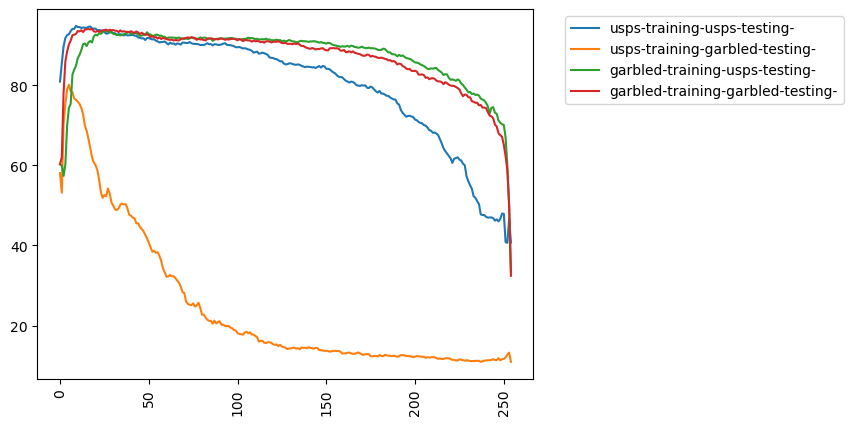

In [58]:
ax = plt.gca()

for col in acc.columns:
    acc.plot(kind='line', y=col, ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

In [60]:
def plot_digits(data):
    if isinstance(data, str):
        row_data = list(map(float, data.split(',')))

    data_length = len(data)
    side_length = int(np.sqrt(data_length))
    
    if side_length ** 2 != data_length:
        raise ValueError("The length of the data is not a perfect square.")
    plt.figure(figsize=(2,2))
   
    image_data = np.array(data).reshape(16,16)

    plt.imshow(image_data, cmap='gray', interpolation='bilinear')
    plt.colorbar()
    plt.title('MNIST Row Image')
    plt.show()

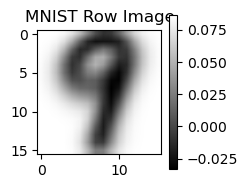

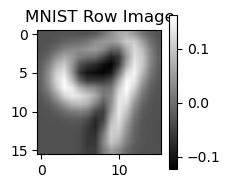

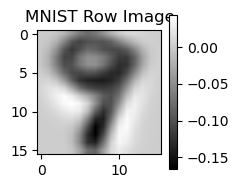

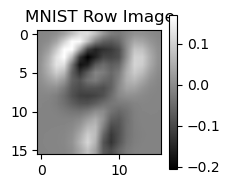

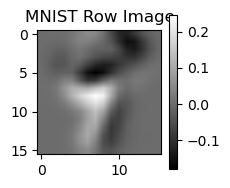

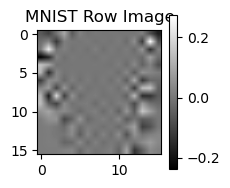

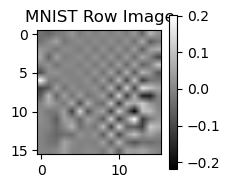

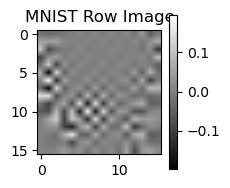

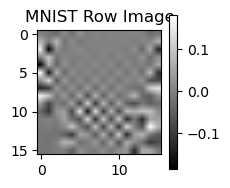

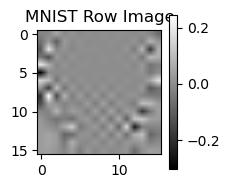

In [61]:
usps9 = loaddigits(uspsTraining + str(9) + ".csv")
U, S, Vt = np.linalg.svd(np.transpose(usps9))

for i in range(5):
    plot_digits(U[:,i].reshape(16,16))
    
for i in range(200, 205):
    plot_digits(U[:,i].reshape(16,16))

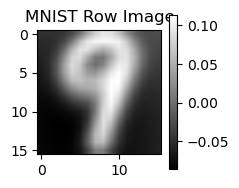

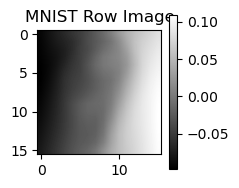

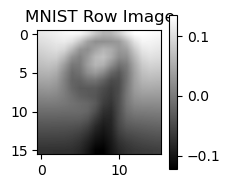

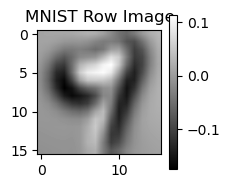

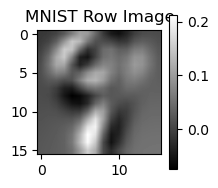

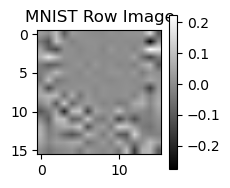

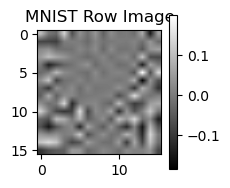

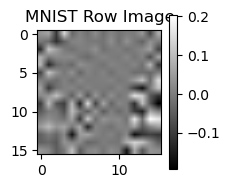

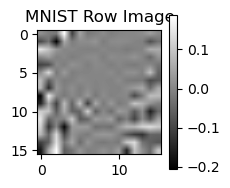

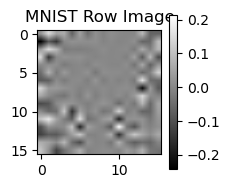

In [62]:
gg9 = loaddigits(ggTraining + str(9) + ".csv")
U, S, Vt = np.linalg.svd(np.transpose(gg9))

for i in range(5):
    plot_digits(U[:,i].reshape(16,16))
    
for i in range(200, 205):
    plot_digits(U[:,i].reshape(16,16))